**Importing the dataset**

In [2]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)


100%|██████████| 25.7M/25.7M [00:00<00:00, 78.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


**Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv(f'{path}/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Exploratory data analysis**

In [5]:
#Summary of the dataset
df.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
#sentiment count
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


**Data Preprocessing**

In [8]:
def clean_text(text):
    text = re.sub(r'(?i)<br\s*/?>', ' ', text)  #  <br />, <br>, and <BR>
    text = re.sub(r'\W', ' ', text)             #  non-word characters
    text = re.sub(r'\d+', '', text)             #  digits
    text = text.lower()                         #  lowercase

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [9]:
df['cleaned_review'] = df['review'].apply(clean_text) #showing reviews after cleaning
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [10]:
df['tokens'] = df['cleaned_review'].apply(word_tokenize)

# Check
print(df[['cleaned_review', 'tokens']].head())

                                      cleaned_review  \
0  one reviewers mentioned watching oz episode ho...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically family little boy jake thinks zombie...   
4  petter mattei love time money visually stunnin...   

                                              tokens  
0  [one, reviewers, mentioned, watching, oz, epis...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, thinks,...  
4  [petter, mattei, love, time, money, visually, ...  


In [11]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Check
print(X.shape)

(50000, 5000)


**Define labels**

In [12]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y = df['sentiment'].values


#check
print(y[:5])


[1 1 1 0 1]


**Splitting data**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#check
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (40000, 5000)
X_test shape: (10000, 5000)
y_train shape: (40000,)
y_test shape: (10000,)


**Modelling the dataset with Logistic Regression, Naïve Bayes**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()


**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  confusion_matrix, f1_score

# Logistic Regression Evaluation
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Naive Bayes Evaluation
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1-Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Logistic Regression Performance:
Accuracy: 0.8927
Precision: 0.8837074303405573
Recall: 0.9063306211549911
F1-Score: 0.8948760654452826
Confusion Matrix:
 [[4360  601]
 [ 472 4567]]

Naive Bayes Performance:
Accuracy: 0.8584
Precision: 0.8497779494110832
Recall: 0.8733875769001787
F1-Score: 0.8614210217263653
Confusion Matrix:
 [[4183  778]
 [ 638 4401]]


In [ ]:
from sklearn.metrics import classification_report

# LR
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

#NB
print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

In [ ]:
# Count the occurrences of each sentiment type
sentiment_counts = df['sentiment'].value_counts()

**Sentiment Distribution Visualization**

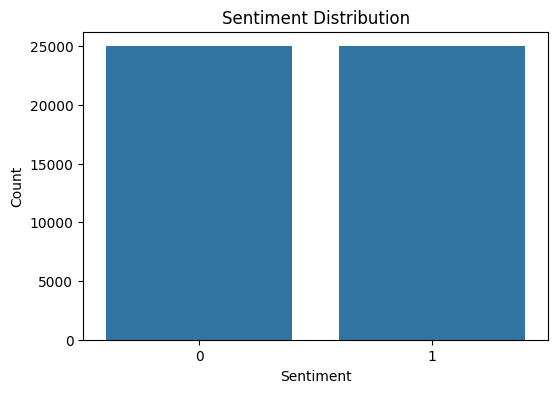

In [ ]:
# Set up the plot size
plt.figure(figsize=(6, 4))
# Create a bar plot to show the distribution of sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
# Add title and axis labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
# Display the plot
plt.show()

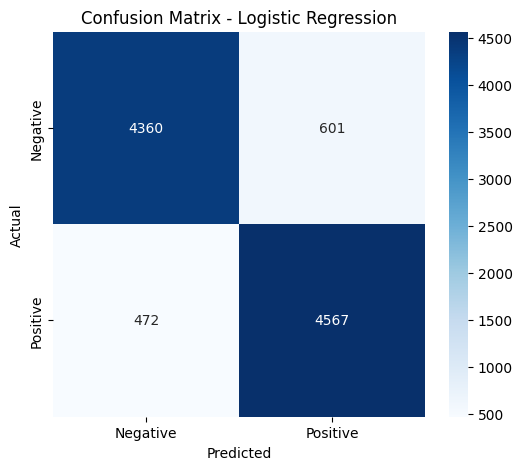

In [ ]:
# Create the confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
# Set up the plot size
plt.figure(figsize=(6, 5))
# Plot the confusion matrix as a heatmap with labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# Add title and labels for clarity
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Show the plot
plt.show()


**Word Cloud Visualization**

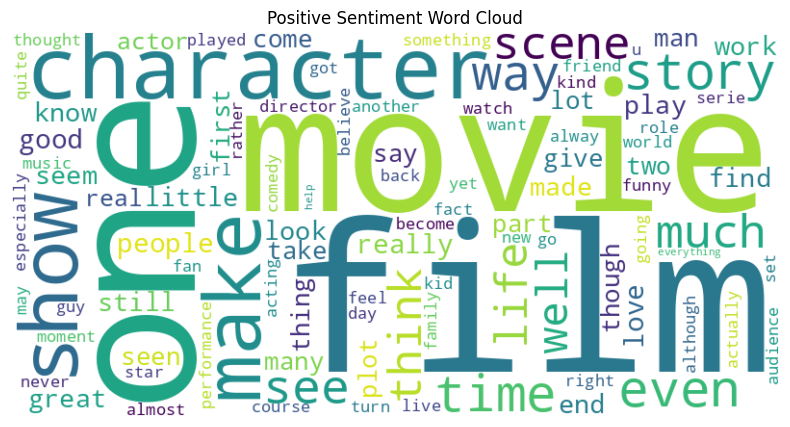

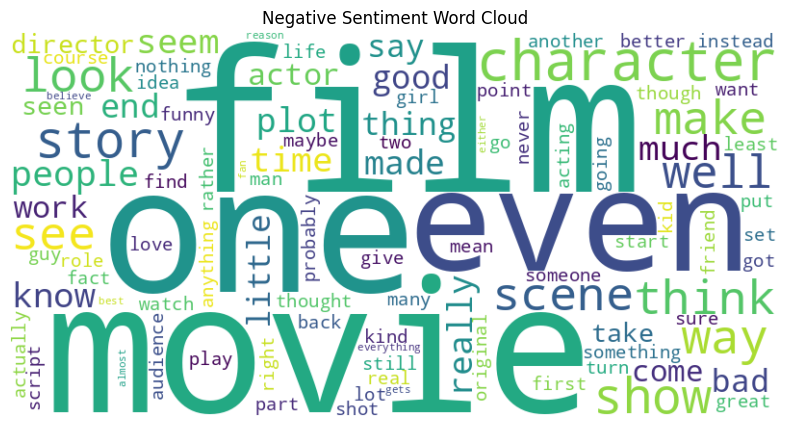

In [ ]:

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])


def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive Reviews
generate_wordcloud(positive_reviews, 'Positive Sentiment Word Cloud')

# Negative Reviews
generate_wordcloud(negative_reviews, 'Negative Sentiment Word Cloud')


**ROC Curve Visualization**

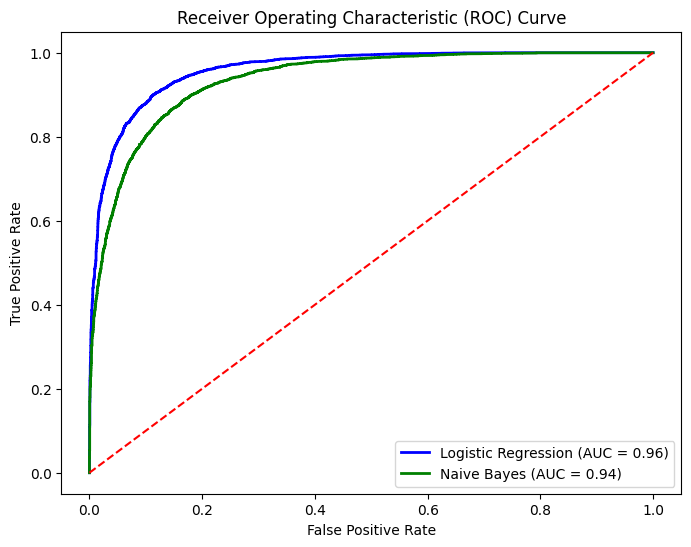

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Get the probability estimates for the positive class
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Logistic Regression
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Naive Bayes

# Calculate ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


In [ ]:
# Generate a confusion matrix to evaluate the performance of the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)

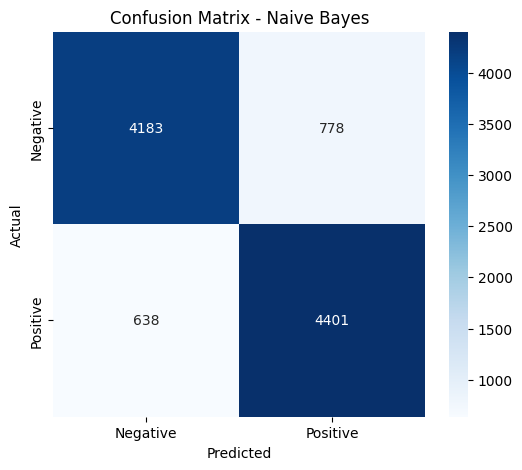

In [ ]:
# Set up the figure size
plt.figure(figsize=(6, 5))
# Create a heatmap for the confusion matrix with annotations, using a blue color map
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# Add a title to the heatmap for clarity
plt.title('Confusion Matrix - Naive Bayes')
# Label the x-axis as 'Predicted' to show predicted class values
plt.xlabel('Predicted')
# Label the y-axis as 'Actual' to show actual class values
plt.ylabel('Actual')
# Display the plot
plt.show()